# Gender, Party, and Public Sentiment: Analyzing Political Discussions on Reddit

## Introduction

In recent years, social media platforms have emerged as crucial arenas for political discourse, fundamentally reshaping how the public engages with political figures and issues (Anderson & Auxier, 2021). Reddit, with its unique community-driven structure and demographic composition, has become a particularly significant venue for political discussions, offering valuable insights into public sentiment and discourse patterns (Barthel et al., 2016).

This study analyzes public sentiment and language patterns in Reddit discussions about prominent U.S. politicians across gender and party lines, including Donald Trump, Joe Biden, Kamala Harris, Alexandria Ocasio-Cortez (AOC), and Nancy Pelosi. By examining these discussions, we aim to understand how political figures are perceived and discussed online, with particular attention to potential differences in discourse patterns based on gender and party affiliation (McGregor & Mourao, 2016). Through systematic analysis of social media comments, this research contributes to our understanding of how political discussions manifest in digital spaces and how factors such as gender and party affiliation might influence public discourse (Rheault et al., 2019).


### Research Question
How do sentiment patterns and language use in Reddit discussions vary across politicians of different genders and party affiliations?


### Hypothesis

Based on our research focus on gender and party differences in political discussions, we hypothesize that:

1. Comments about Democratic politicians will show more positive sentiment on Reddit compared to Republican politicians, given Reddit's user demographic characteristics.

2. Female politicians will receive more comments focusing on personal attributes (appearance, personality) and family-related topics, while male politicians' discussions will center more on policy positions.

3. The combination of gender and party affiliation will create distinct discussion patterns, with Democratic female politicians receiving different types of comments compared to Republican female politicians.


### Significance
This research contributes to our understanding of:
1. How political discussions manifest on social media platforms
2. The role of gender and party affiliation in shaping online political discourse
3. The evolution of political communication in digital spaces

## Research Methodology

### Data Collection

Our research examines discussions about ten prominent American politicians across party lines and genders. We collected data from Reddit using the Python Reddit API Wrapper (PRAW). The data collection period spanned from January to March 2024, resulting in a total of 34,283 comments. 

The dataset includes comments about Democratic politicians (Bernie Sanders: 4,515, Joe Biden: 3,854, AOC: 3,503, Kamala Harris: 3,404), Republican politicians (Donald Trump: 4,239, Ron DeSantis: 2,910, Nikki Haley: 2,540, Marjorie Taylor Greene: 2,141), and notable figures who have shown independence from party lines (Nancy Pelosi: 3,975, Liz Cheney: 3,202). This diverse selection of politicians allows us to examine how gender and party affiliation influence public discourse on Reddit.



### Data Processing

The raw data underwent systematic cleaning and preprocessing. First, we removed deleted comments, automated bot responses, and duplicate content. We then standardized the text data by removing URLs and special characters, converting text to lowercase, and removing excess whitespace. Using the Natural Language Toolkit (NLTK), we tokenized the text and removed common stop words. All timestamps were standardized to a consistent date-time format for subsequent time series analysis.

The processed data was structured into a dataframe containing fields for the politician’s name, comment content, timestamp, comment score, and other relevant metadata.

### Analytical Methods

We primarily employed two analytical approaches. The first was sentiment analysis using the VADER sentiment analyzer, which is designed specifically for social media content (Hutto & Gilbert, 2014). VADER calculates positive, negative, neutral, and compound sentiment scores for comments. Compound scores range from -1 to 1, with scores above 0.05 classified as positive, below -0.05 as negative, and scores in between as neutral.

The second approach was a word frequency analysis focusing on four categories of words: appearance-related (e.g., "beautiful," "ugly"), personality traits (e.g., "strong," "weak"), leadership abilities (e.g., "leader," "decisive"), and family-related terms (e.g., "mother," "wife"). By analyzing the frequency of these words, we aimed to understand the public's focus when discussing these female politicians and to assess whether gender bias was present.

## Results

Our analysis results are primarily divided into three key sections: sentiment analysis and word frequency analysis. The code and visualizations presented below illustrate the patterns of discussion and sentiment tendencies of Reddit users toward female politicians.

In [1]:
# libraries
import pandas as pd
import os
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter
import re
import numpy as np
from wordcloud import WordCloud
from scipy import stats
# download necessary NLTK data

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\star\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Collection

We collected data from Reddit using the `crawlDataReddit.py` script. The dataset includes comments about ten prominent politicians: five female politicians (Kamala Harris, Alexandria Ocasio-Cortez, Nancy Pelosi, Liz Cheney, Nikki Haley, and Marjorie Taylor Greene) and four male politicians (Bernie Sanders, Donald Trump, Joe Biden, and Ron DeSantis). This balanced selection allows us to examine discussions across both gender and party lines.

We collected first 10 posts for each keyword.

In [2]:
df = pd.read_csv("politicians_comments_20241215_1451.csv")
df.head()

politician search_keyword       party  gender  \
0  Kamala Harris         Harris  Democratic  Female   
1  Kamala Harris         Harris  Democratic  Female   
2  Kamala Harris         Harris  Democratic  Female   
3  Kamala Harris         Harris  Democratic  Female   
4  Kamala Harris         Harris  Democratic  Female   

                                          post_title  post_id  \
0  Hillary Clinton and Kamala Harris after the 20...  1glwwpb   
1  Hillary Clinton and Kamala Harris after the 20...  1glwwpb   
2  Hillary Clinton and Kamala Harris after the 20...  1glwwpb   
3  Hillary Clinton and Kamala Harris after the 20...  1glwwpb   
4  Hillary Clinton and Kamala Harris after the 20...  1glwwpb   

                                            post_url  \
0  https://reddit.com/r/pics/comments/1glwwpb/hil...   
1  https://reddit.com/r/pics/comments/1glwwpb/hil...   
2  https://reddit.com/r/pics/comments/1glwwpb/hil...   
3  https://reddit.com/r/pics/comments/1glwwpb/hil...   
4  https://reddit.com/r/pics/comments/1glwwpb/hil...   

                                        comment_body  comment_score  \
0  It looks like this post is about Politics. Var...              1   
1  Meanwhile, Joe Biden is ready to put on his av...          12499   
2                              "do you get deja vu?"          16526   
3  Man, talk about a picture saying a thousand wo...          18479   
4                   She looks depressed and tired...          11297   

       comment_created comment_id  
0  2024-11-08 02:09:16    lvxpbns  
1  2024-11-08 04:44:03    lvymd2i  
2  2024-11-08 02:23:48    lvxsfr4  
3  2024-11-08 03:05:12    lvy1ej8  
4  2024-11-08 02:54:45    lvxz5b1

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34283 entries, 0 to 34282
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   politician       34283 non-null  object
 1   search_keyword   34283 non-null  object
 2   party            34283 non-null  object
 3   gender           34283 non-null  object
 4   post_title       34283 non-null  object
 5   post_id          34283 non-null  object
 6   post_url         34283 non-null  object
 7   comment_body     34282 non-null  object
 8   comment_score    34283 non-null  int64 
 9   comment_created  34283 non-null  object
 10  comment_id       34283 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.9+ MB


We have 34283 comments in total.

In [4]:
df['search_keyword'].value_counts()


search_keyword
Sanders     4515
Trump       4239
Pelosi      3975
Biden       3854
AOC         3503
Harris      3404
Cheney      3202
DeSantis    2910
Haley       2540
Greene      2141
Name: count, dtype: int64

We can find that Sanders has the most comments.


### Sentiment Analysis

#### Basic analysis

Let's start with a basic sentiment analysis of all comments. First, we'll calculate sentiment scores for each comment and visualize the overall distribution of positive, negative, and neutral sentiments across our dataset.

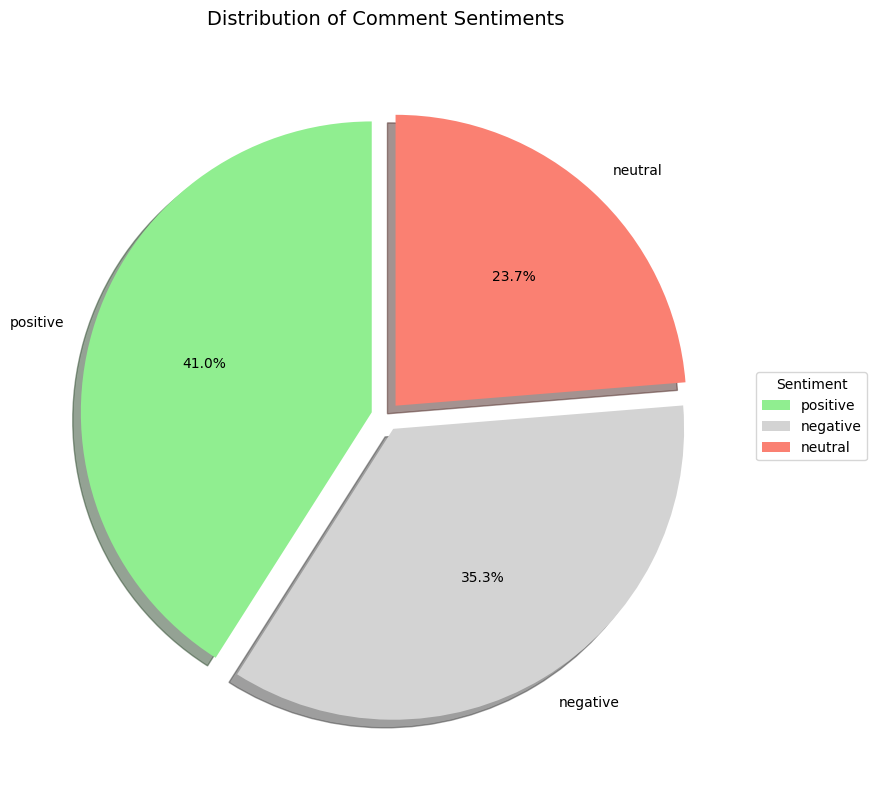


Sentiment Distribution:
positive: 14051 comments (41.0%)
negative: 12101 comments (35.3%)
neutral: 8131 comments (23.7%)


In [5]:
# Basic Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    try:
        scores = analyzer.polarity_scores(str(text))
        return scores
    except:
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}

# Calculate sentiment scores
df['sentiment_scores'] = df['comment_body'].apply(analyze_sentiment)
df['negative_score'] = df['sentiment_scores'].apply(lambda x: x['neg'])
df['neutral_score'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['positive_score'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Define sentiment categories
df['sentiment'] = df['compound_score'].apply(lambda x: 
    'positive' if x >= 0.05 
    else 'negative' if x <= -0.05 
    else 'neutral')


sentiment_stats = df['sentiment'].value_counts()
total = len(df)
percentages = [count/total*100 for count in sentiment_stats]

plt.figure(figsize=(12, 8))
plt.pie(percentages, 
        labels=sentiment_stats.index,
        colors=['lightgreen', 'lightgray', 'salmon'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=(0.05, 0.05, 0.05))

plt.title('Distribution of Comment Sentiments', pad=20, size=14)
plt.legend(sentiment_stats.index, 
          title="Sentiment",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

print("\nSentiment Distribution:")
for sentiment, count in sentiment_stats.items():
    percentage = count/total*100
    print(f"{sentiment}: {count} comments ({percentage:.1f}%)")

The sentiment analysis shows that positive comments (41.0%) slightly outweigh negative ones (35.3%), with neutral comments making up 23.7%. This suggests that Reddit discussions about politicians are more balanced than typically assumed, with a slight tendency toward positive sentiment.

#### Multidimensional Analysis

**Analysis by Gender**

Now let's examine whether gender influences sentiment in political discussions by comparing sentiment scores between male and female politicians.

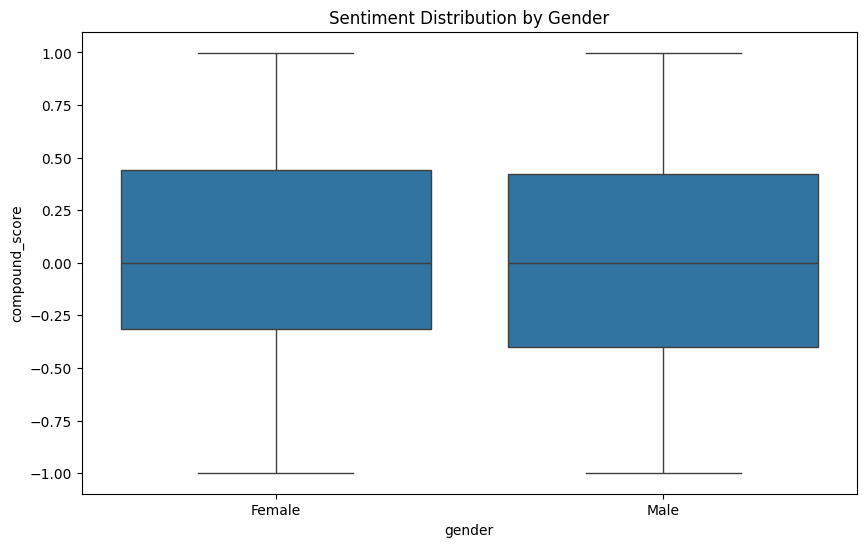


Gender Comparison T-test:
t-statistic: -7.0706
p-value: 0.0000

Mean Sentiment Scores:
Male politicians: 0.011
Female politicians: 0.051


In [17]:
# Comparison by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='compound_score', data=df)
plt.title('Sentiment Distribution by Gender')
plt.show()

# Conducting t-test and calculating means
male_scores = df[df['gender'] == 'Male']['compound_score']
female_scores = df[df['gender'] == 'Female']['compound_score']

# means
male_mean = male_scores.mean()
female_mean = female_scores.mean()

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

print(f"\nGender Comparison T-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\nMean Sentiment Scores:")
print(f"Male politicians: {male_mean:.3f}")
print(f"Female politicians: {female_mean:.3f}")

The analysis reveals a statistically significant difference (p < 0.001) in sentiment scores between genders, with female politicians receiving slightly more positive comments (mean = 0.051) compared to male politicians (mean = 0.011).

**Analysis by Party**

Next, we analyze the sentiment differences between political parties to understand if party affiliation affects public sentiment on Reddit.

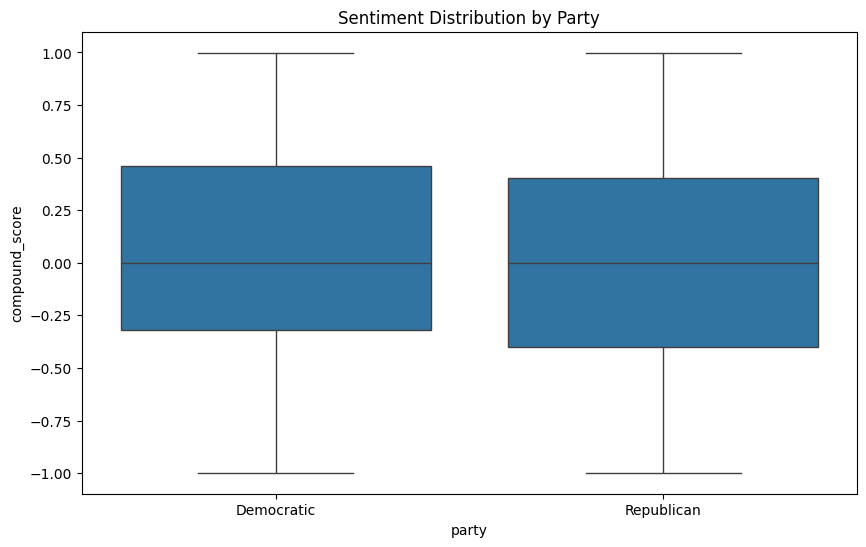


Party Comparison T-test:
t-statistic: 10.5880
p-value: 0.0000

Mean Sentiment Scores:
Democratic politicians: 0.059
Republican politicians: -0.000


In [18]:
# Comparison by Party
plt.figure(figsize=(10, 6))
sns.boxplot(x='party', y='compound_score', data=df)
plt.title('Sentiment Distribution by Party')
plt.show()

dem_scores = df[df['party'] == 'Democratic']['compound_score']
rep_scores = df[df['party'] == 'Republican']['compound_score']

dem_mean = dem_scores.mean()
rep_mean = rep_scores.mean()

t_stat, p_value = stats.ttest_ind(dem_scores, rep_scores)

print(f"\nParty Comparison T-test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\nMean Sentiment Scores:")
print(f"Democratic politicians: {dem_mean:.3f}")
print(f"Republican politicians: {rep_mean:.3f}")

The t-test shows a highly significant difference (p < 0.001) in sentiment between parties, with Democratic politicians receiving more positive comments (mean = 0.059) than Republican politicians (mean = -0.000), suggesting a clear partisan bias in Reddit discussions.

**Intersection Analysis of Gender and Party**

To get a more nuanced understanding, let's examine the interaction between gender and party affiliation in sentiment scores.

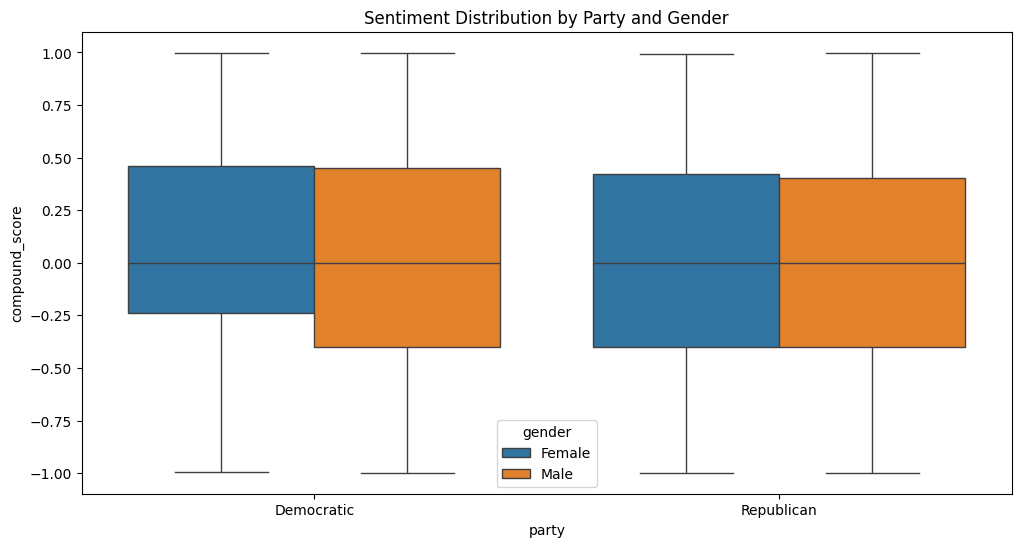


Mean Sentiment Scores by Gender and Party:
Female Democratic: 0.084
Female Republican: 0.005
Male Democratic: 0.026
Male Republican: -0.006


In [19]:
# Intersection Analysis of Gender and Party
plt.figure(figsize=(12, 6))
sns.boxplot(x='party', y='compound_score', hue='gender', data=df)
plt.title('Sentiment Distribution by Party and Gender')
plt.show()

gender_party_means = df.groupby(['gender', 'party'])['compound_score'].mean()

print("\nMean Sentiment Scores by Gender and Party:")
for index, mean in gender_party_means.items():
    print(f"{index[0]} {index[1]}: {mean:.3f}")

The visualization reveals an interesting pattern: while Democratic female politicians receive notably more positive sentiment than Democratic males, Republican politicians show similar sentiment scores regardless of gender, suggesting gender plays a more significant role in Democratic party discussions.

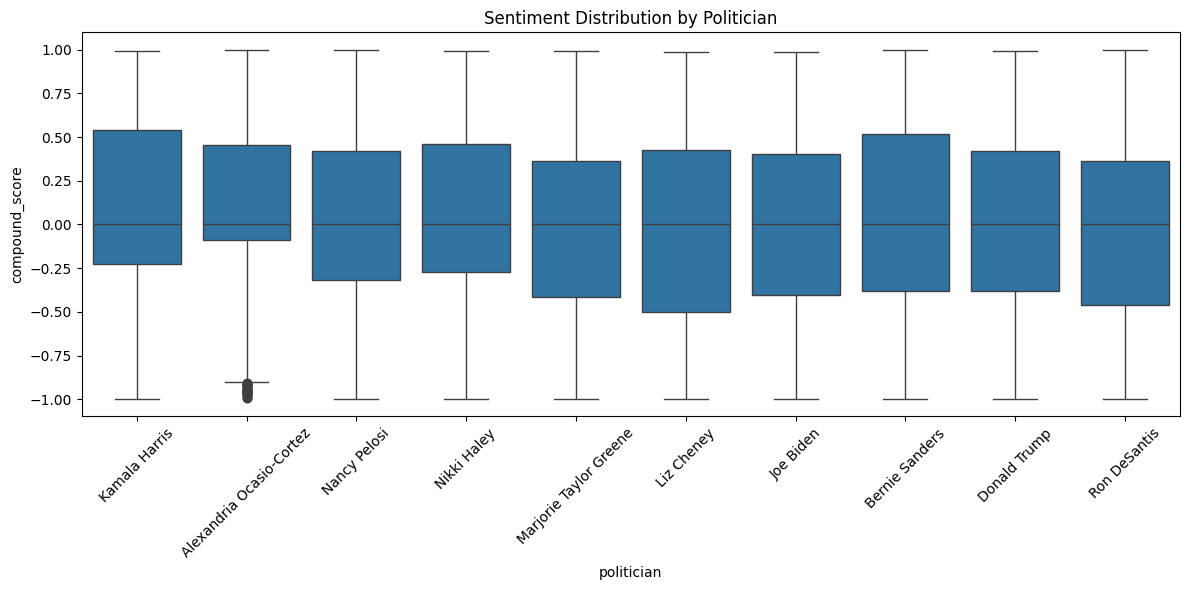

In [9]:
# Sentiment Score Comparison of Various Politicians
plt.figure(figsize=(12, 6))
sns.boxplot(x='politician', y='compound_score', data=df)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Politician')
plt.tight_layout()
plt.show()


The boxplot shows relatively consistent sentiment distributions across most politicians, with Kamala Harris receiving slightly more positive sentiment overall. This suggests that public sentiment on Reddit is fairly uniform across politicians, regardless of their party or gender.

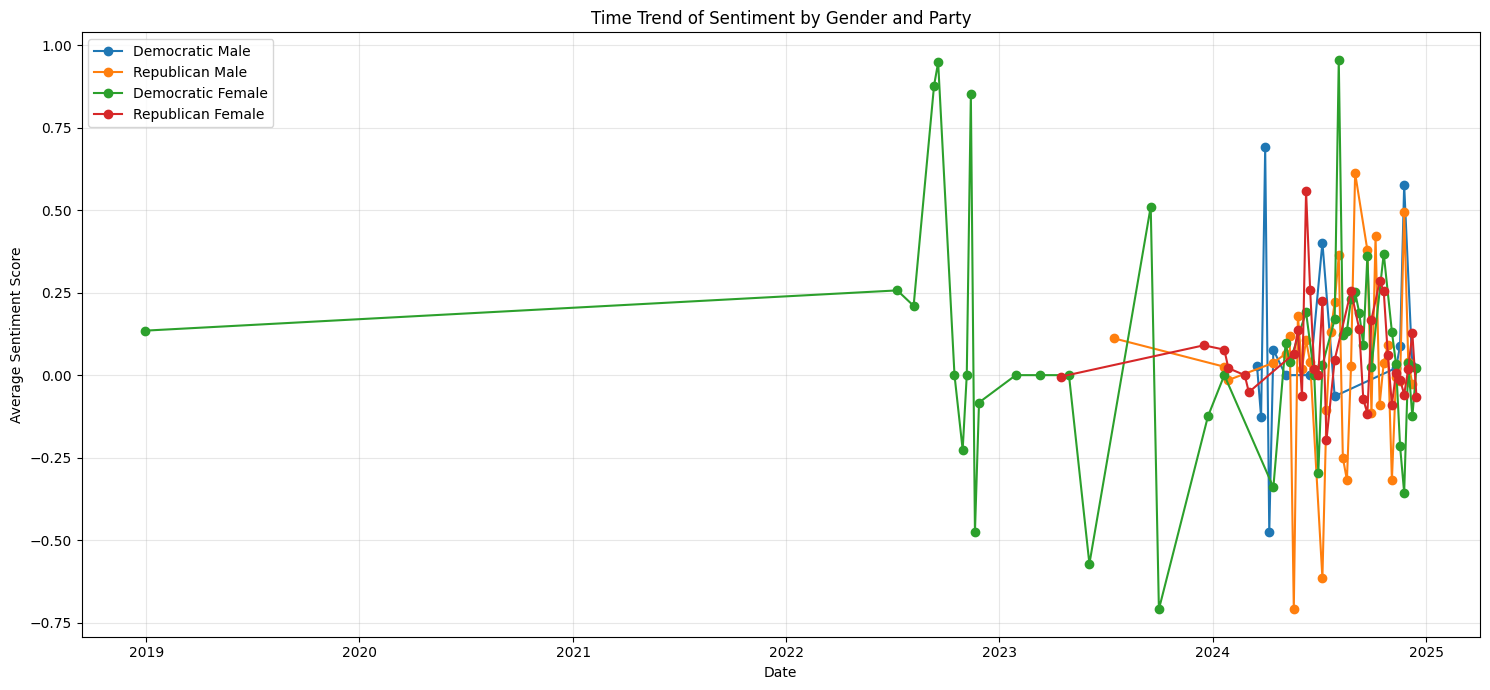

In [10]:
# Time Trend Analysis
df['comment_created'] = pd.to_datetime(df['comment_created'])

# Calculate the average sentiment score by week
sentiment_over_time = df.groupby([
    pd.Grouper(key='comment_created', freq='W'),
    'gender',
    'party'
])['compound_score'].mean().reset_index()

# Plot the time series graph
plt.figure(figsize=(15, 7))
for gender in ['Male', 'Female']:
    for party in ['Democratic', 'Republican']:
        data = sentiment_over_time[
            (sentiment_over_time['gender'] == gender) & 
            (sentiment_over_time['party'] == party)
        ]
        plt.plot(
            data['comment_created'],
            data['compound_score'],
            label=f'{party} {gender}',
            marker='o'
        )

plt.title('Time Trend of Sentiment by Gender and Party')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



### Word Frequency Analysis

we conduct word frequency analysis to examine language patterns in the comments, 
focusing on potentially gendered terms across different categories (appearance, personality, leadership, and family).


In [11]:
# Basic Word Frequency Analysis
def preprocess_text(text):
    """Preprocess text"""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Define key word categories
gendered_terms = {
    'appearance': ['beautiful', 'ugly', 'dress', 'hair', 'looks', 'attractive', 'pretty'],
    'personality': ['emotional', 'aggressive', 'strong', 'weak', 'tough', 'soft', 'hysteric'],
    'leadership': ['boss', 'leader', 'powerful', 'decisive', 'ambitious', 'bossy'],
    'family': ['mother', 'wife', 'daughter', 'family', 'married', 'children']
}

Let's first look at the most common words used in discussions about each politician.


In [12]:
### Word Frequency Analysis

politician_word_freqs = {}

for politician in df['politician'].unique():
    comments = df[df['politician'] == politician]['comment_body']
    
    all_tokens = []
    for comment in comments:
        tokens = preprocess_text(str(comment))
        all_tokens.extend(tokens)
    
    word_freq = Counter(all_tokens)
    
    # Create and display dataframe of top 20 words
    common_words_df = pd.DataFrame(word_freq.most_common(20), 
                                 columns=['Word', 'Frequency'])
    
    print(f"\nTop 20 most common words for {politician}:")
    display(common_words_df.T)
    
    politician_word_freqs[politician] = word_freq


Top 20 most common words for Kamala Harris:


0      1     2      3      4     5      6    7     8   \
Word       people  trump  like  would  think  dont  biden  get  even   
Frequency     656    578   515    414    405   382    330  289   287   

                 9    10    11     12      13    14        15      16     17  \
Word       campaign  one  time  didnt  harris  vote  election  kamala  going   
Frequency       286  281   279    276     269   262       262     241    239   

             18    19  
Word       good  know  
Frequency   235   218


Top 20 most common words for Alexandria Ocasio-Cortez:


0       1      2     3     4    5    6      7      8     9   \
Word       like  people  would  dont  shes  get  one  party  thats  even   
Frequency   484     422    298   287   269  256  224    221    211   210   

              10   11    12     13    14    15     16    17   18    19  
Word       think  aoc  time  trump  know  good  right  vote  see  want  
Frequency    210  194   190    190   177   173    168   161  155   149


Top 20 most common words for Nancy Pelosi:


0     1     2     3      4       5    6    7        8   \
Word       people  like  shes  dont  would  pelosi  get  one  trading   
Frequency     623   567   384   376    358     351  325  325      301   

                9      10    11   12    13     14     15     16     17     18  \
Word       insider  think  even  old  time  money  years  stock  nancy  thats   
Frequency      297    291   268  264   246    232    226    223    222    218   

                 19  
Word       congress  
Frequency       203


Top 20 most common words for Nikki Haley:


0      1      2     3     4       5     6      7     8   \
Word       trump  would  haley  like  vote  people  dont  think  shes   
Frequency    875    541    379   371   327     308   304    253   238   

                   9      10     11   12   13    14         15    16     17  \
Word       republican  biden  party  get  one  even  president  time  nikki   
Frequency         229    200    198  180  176   173        166   153    152   

             18    19  
Word       good  want  
Frequency   147   146


Top 20 most common words for Marjorie Taylor Greene:


0       1     2      3     4      5    6    7      8     9   \
Word       like  people  dont  would  shes  trump  one  mtg  think  know   
Frequency   316     267   214    186   183    167  160  155    146   135   

             10   11     12    13    14       15     16   17    18    19  
Word       even  get  thats  time  said  release  right  see  shit  cant  
Frequency   128  125    117   105   100       99     98   96    92    92


Top 20 most common words for Liz Cheney:


0       1     2       3     4     5      6       7      8   \
Word       trump  people  like  harris  vote  dont  would  cheney  think   
Frequency    900     727   567     505   486   479    461     450    371   

                    9      10     11   12    13      14          15     16  \
Word       republicans  party  right  get  even  voters  republican  didnt   
Frequency          366    330    317  301   287     280         276    265   

              17   18         19  
Word       going  one  democrats  
Frequency    263  258        251


Top 20 most common words for Joe Biden:


0      1      2      3     4     5    6      7     8   \
Word       people  trump  biden  would  like  dont  one  think  even   
Frequency     842    830    701    616   548   492  351    348   333   

                  9    10      11    12     13    14      15     16    17  \
Word       president  get  pardon  time  going  good  hunter  thats  vote   
Frequency        330  314     305   301    296   274     253    250   245   

              18    19  
Word       didnt  know  
Frequency    243   237


Top 20 most common words for Bernie Sanders:


0      1       2     3      4     5      6          7    8   \
Word       people  trump  bernie  like  would  dont  think  democrats  get   
Frequency    1506    927     911   876    813   773    561        548  515   

             9      10   11     12     13    14    15     16    17    18    19  
Word       even  party  one  right  going  vote  want  biden  time  need  much  
Frequency   498    496  493    479    450   412   407    400   392   365   362


Top 20 most common words for Donald Trump:


0       1     2      3     4      5    6    7    8     9   \
Word       trump  people  like  would  dont  think  hes  get  one  even   
Frequency    958     723   672    546   469    437  357  339  334   318   

              10    11     12    13        14      15   16    17     18     19  
Word       going  time  didnt  know  election  really  see  said  years  thats  
Frequency    298   278    246   239       234     230  229   227    226    225


Top 20 most common words for Ron DeSantis:


0       1         2     3        4     5      6    7    8    9   \
Word       trump  people  desantis  like  florida  dont  would  get  one  hes   
Frequency    573     533       490   455      423   400    358  283  276  274   

              10    11     12     13    14    15    16      17     18      19  
Word       think  even  thats  state  also  know  want  doesnt  going  really  
Frequency    256   251    217    217   183   168   167     167    156     152

Now we analyze the frequency of gendered terms across different categories.


In [13]:
gender_terms_data = {}

# Analyze gendered terms for each politician
for politician in df['politician'].unique():
    comments = df[df['politician'] == politician]['comment_body']
    
    all_tokens = []
    for comment in comments:
        tokens = preprocess_text(str(comment))
        all_tokens.extend(tokens)
    
    word_freq = Counter(all_tokens)
    
    for category, terms in gendered_terms.items():
        for term in terms:
            if term not in gender_terms_data:
                gender_terms_data[term] = {'Category': category}
            gender_terms_data[term][politician] = word_freq[term]

gender_df = pd.DataFrame(gender_terms_data).T
gender_df = gender_df.fillna(0)

cols = ['Category'] + [col for col in gender_df.columns if col != 'Category']
gender_df = gender_df[cols]

print("\nGendered terms usage across politicians:")
display(gender_df)


Gendered terms usage across politicians:


C:\Users\star\AppData\Local\Temp\ipykernel_31068\915361192.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gender_df = gender_df.fillna(0)


Category  Kamala Harris  Alexandria Ocasio-Cortez  \
beautiful    appearance             12                        29   
ugly         appearance              0                         5   
dress        appearance              0                         0   
hair         appearance              0                         6   
looks        appearance             39                        50   
attractive   appearance              2                        18   
pretty       appearance             67                        68   
emotional   personality              5                         0   
aggressive  personality              3                         1   
strong      personality             23                        14   
weak        personality              6                         6   
tough       personality             15                         3   
soft        personality              3                         3   
hysteric    personality              0                         0   
boss         leadership              7                         3   
leader       leadership             29                        10   
powerful     leadership             15                        12   
decisive     leadership              0                         0   
ambitious    leadership              1                         1   
bossy        leadership              0                         0   
mother           family              3                         2   
wife             family             15                         7   
daughter         family              7                         0   
family           family             26                        23   
married          family              8                         1   
children         family             20                         6   

            Nancy Pelosi  Nikki Haley  Marjorie Taylor Greene  Liz Cheney  \
beautiful              5            2                       7           0   
ugly                   1            2                       7           3   
dress                  2            0                       2           0   
hair                   1            4                       4           0   
looks                 68           22                      23          10   
attractive             3            1                       3           1   
pretty                69           54                      35          58   
emotional              0            1                       1           2   
aggressive             5            3                       4           1   
strong                18           13                       4          16   
weak                   7           13                       3           8   
tough                  5            3                       2           6   
soft                   3            4                       3          14   
hysteric               0            0                       0           0   
boss                   4            2                       4           3   
leader                21           11                       4          11   
powerful              17            4                       8           9   
decisive               0            0                       1           0   
ambitious              1            1                       1           0   
bossy                  0            0                       0           0   
mother                 6            9                       3           3   
wife                   8           14                       7           6   
daughter               5            3                       5          13   
family                39            8                      16          46   
married               31            1                       4           3   
children              12            7                       4           9   

            Joe Biden  Bernie Sanders  Donald Trump  Ron DeSantis  
beautiful           2         

Let's visualize how different categories of gendered terms are used across politicians.


<Figure size 1200x600 with 0 Axes>

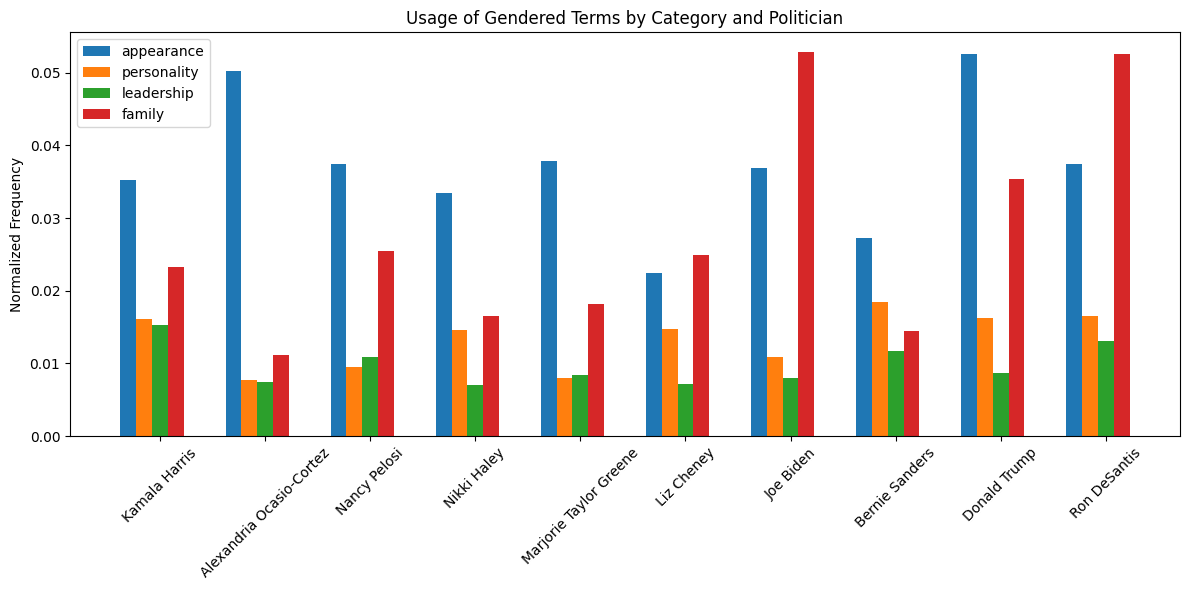

In [14]:
plt.figure(figsize=(12, 6))
category_usage = {category: [] for category in gendered_terms.keys()}

for politician in df['politician'].unique():
    comments = df[df['politician'] == politician]['comment_body']
    
    all_tokens = []
    for comment in comments:
        tokens = preprocess_text(str(comment))
        all_tokens.extend(tokens)
    word_freq = Counter(all_tokens)
    
    for category, terms in gendered_terms.items():
        category_count = sum(word_freq[term] for term in terms)
        # Normalize by number of comments
        normalized_count = category_count / len(comments)
        category_usage[category].append(normalized_count)

x = np.arange(len(df['politician'].unique()))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6))

for category, normalized_counts in category_usage.items():
    offset = width * multiplier
    ax.bar(x + offset, normalized_counts, width, label=category)
    multiplier += 1

ax.set_ylabel('Normalized Frequency')
ax.set_title('Usage of Gendered Terms by Category and Politician')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(df['politician'].unique(), rotation=45)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

Finally, we conduct statistical tests to compare the usage of gendered terms between male and female politicians.


In [15]:
# Calculate gendered terms ratio
def calculate_gendered_terms_ratio(comments):
    """Calculate the proportion of gender-related terms in comments"""
    total_words = 0
    gendered_words = 0
    
    for comment in comments:
        tokens = preprocess_text(str(comment))
        total_words += len(tokens)
        for category_terms in gendered_terms.values():
            gendered_words += sum(tokens.count(term) for term in category_terms)
    
    return gendered_words / total_words if total_words > 0 else 0

# Calculate ratios for male and female politicians
male_comments = df[df['gender'] == 'Male']['comment_body']
female_comments = df[df['gender'] == 'Female']['comment_body']

male_ratio = calculate_gendered_terms_ratio(male_comments)
female_ratio = calculate_gendered_terms_ratio(female_comments)

print("Gendered Terms Usage Ratio:")
print(f"Male politicians: {male_ratio:.6%}")
print(f"Female politicians: {female_ratio:.6%}")

# 2Chi-square test
def create_contingency_table():
    male_text = ' '.join(male_comments.astype(str))
    female_text = ' '.join(female_comments.astype(str))
    
    male_tokens = preprocess_text(male_text)
    female_tokens = preprocess_text(female_text)
    
    # Count gendered and non-gendered terms
    gendered_male = sum(male_tokens.count(term) 
                       for terms in gendered_terms.values() 
                       for term in terms)
    gendered_female = sum(female_tokens.count(term) 
                         for terms in gendered_terms.values() 
                         for term in terms)
    
    non_gendered_male = len(male_tokens) - gendered_male
    non_gendered_female = len(female_tokens) - gendered_female
    
    return [[gendered_male, gendered_female],
            [non_gendered_male, non_gendered_female]]

# Perform chi-square test
contingency_table = create_contingency_table()
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]

print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2:.6f}")
print(f"P-value: {p_value:.6f}")



Gendered Terms Usage Ratio:
Male politicians: 0.512759%
Female politicians: 0.491945%

Chi-square Test Results:
Chi-square statistic: 1.266253
P-value: 0.260471


The statistical analysis reveals two key findings about gendered language use in political discussions:

1. The usage of gendered terms is remarkably similar between male (0.51%) and female (0.49%) politicians, with only a marginal difference. 

2. The chi-square test (p = 0.26 > 0.05) indicates no statistically significant difference in how gendered language is used across genders, suggesting that Reddit users generally discuss politicians similarly regardless of their gender.

These findings challenge common assumptions about gender bias in political discourse, at least within the Reddit community.

Let's visualize the most frequent words used in discussions about each politician using word clouds.


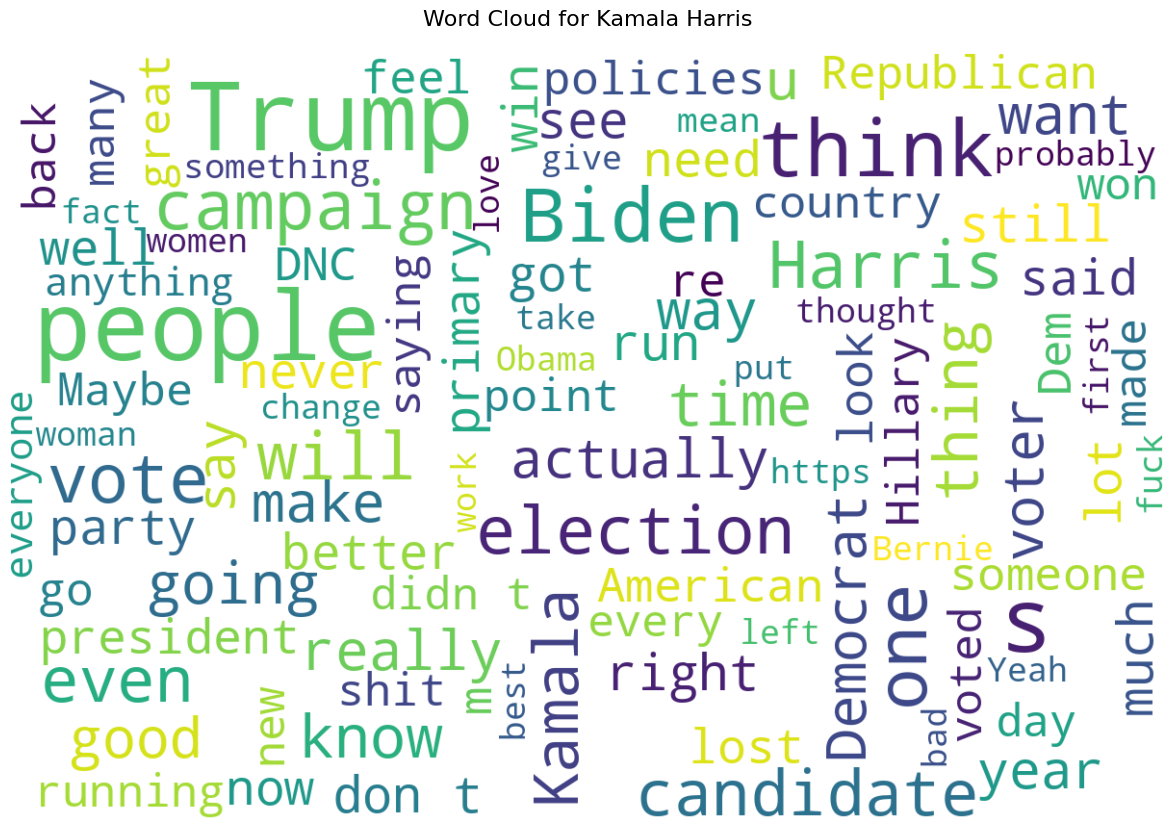

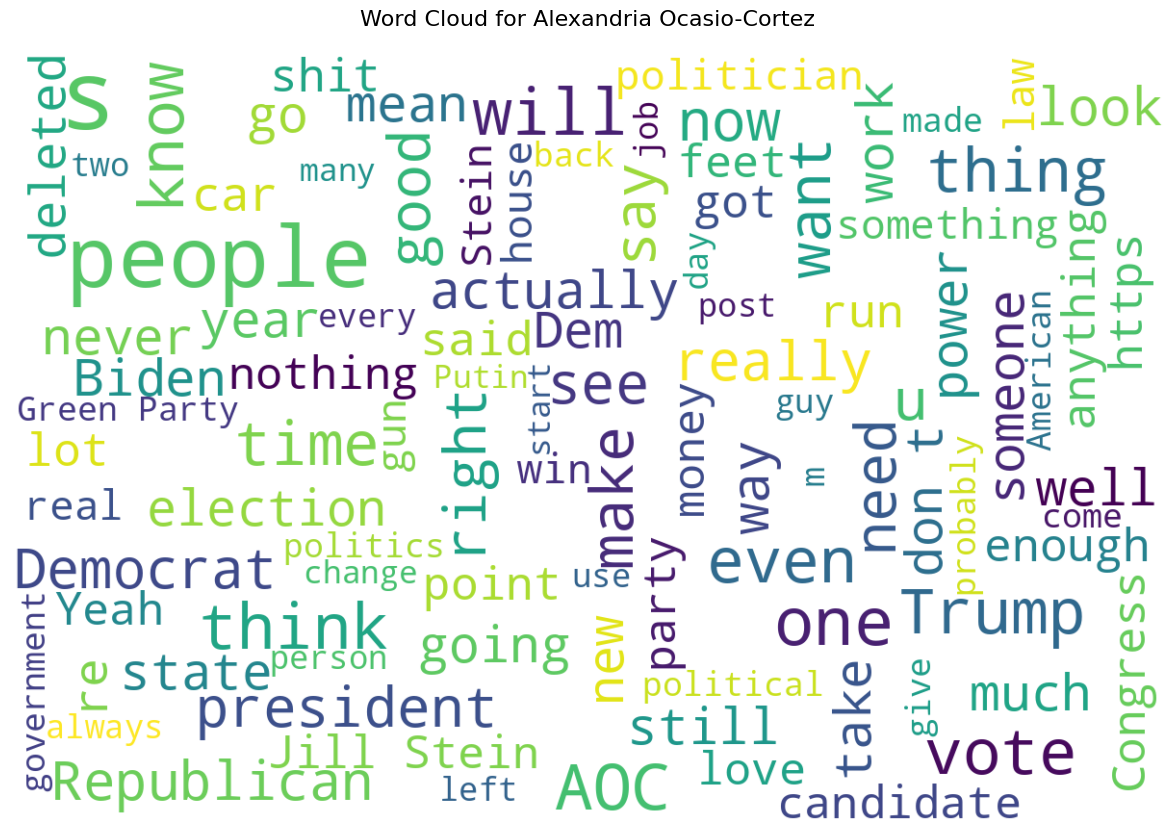

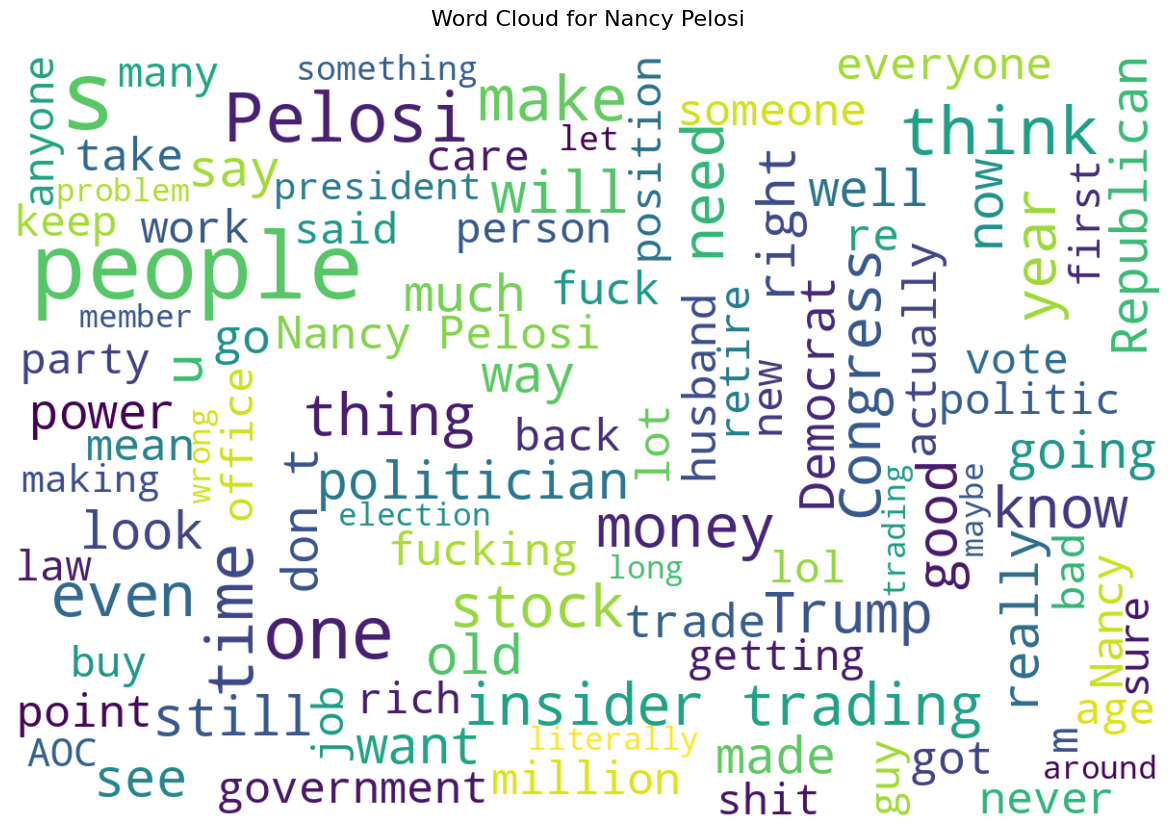

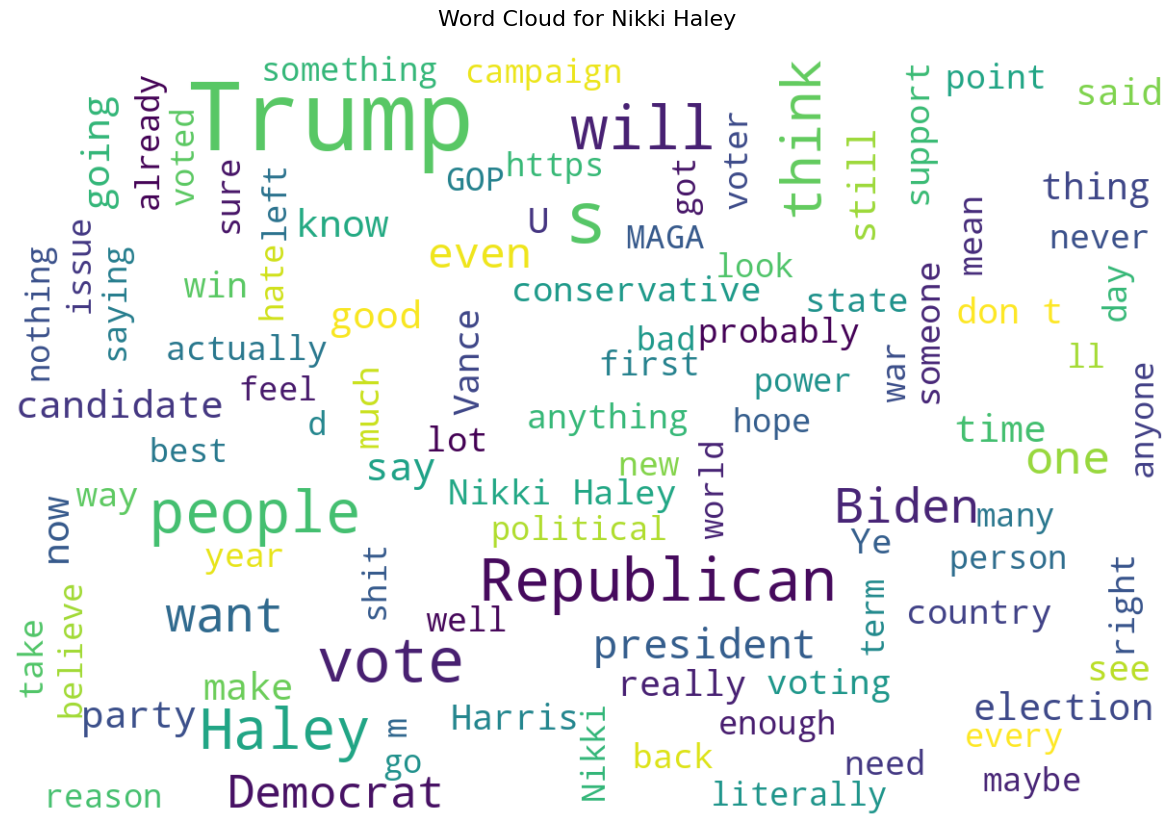

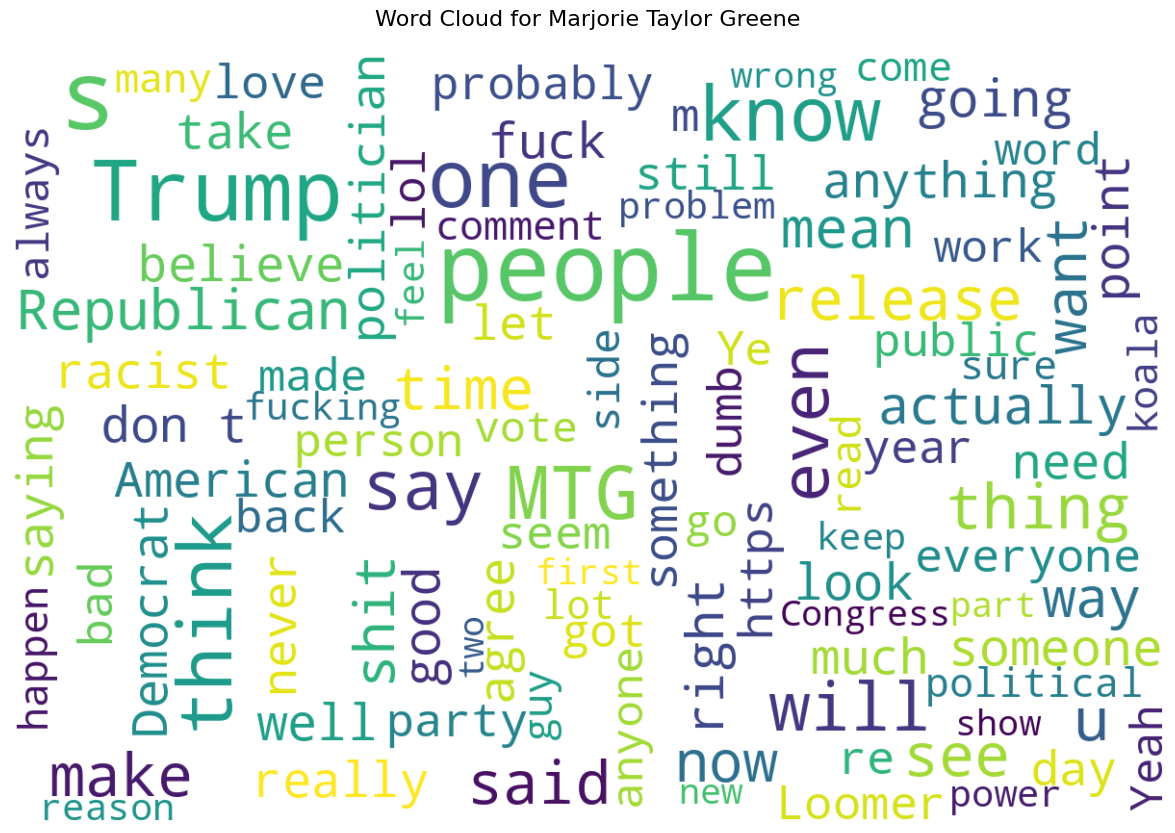

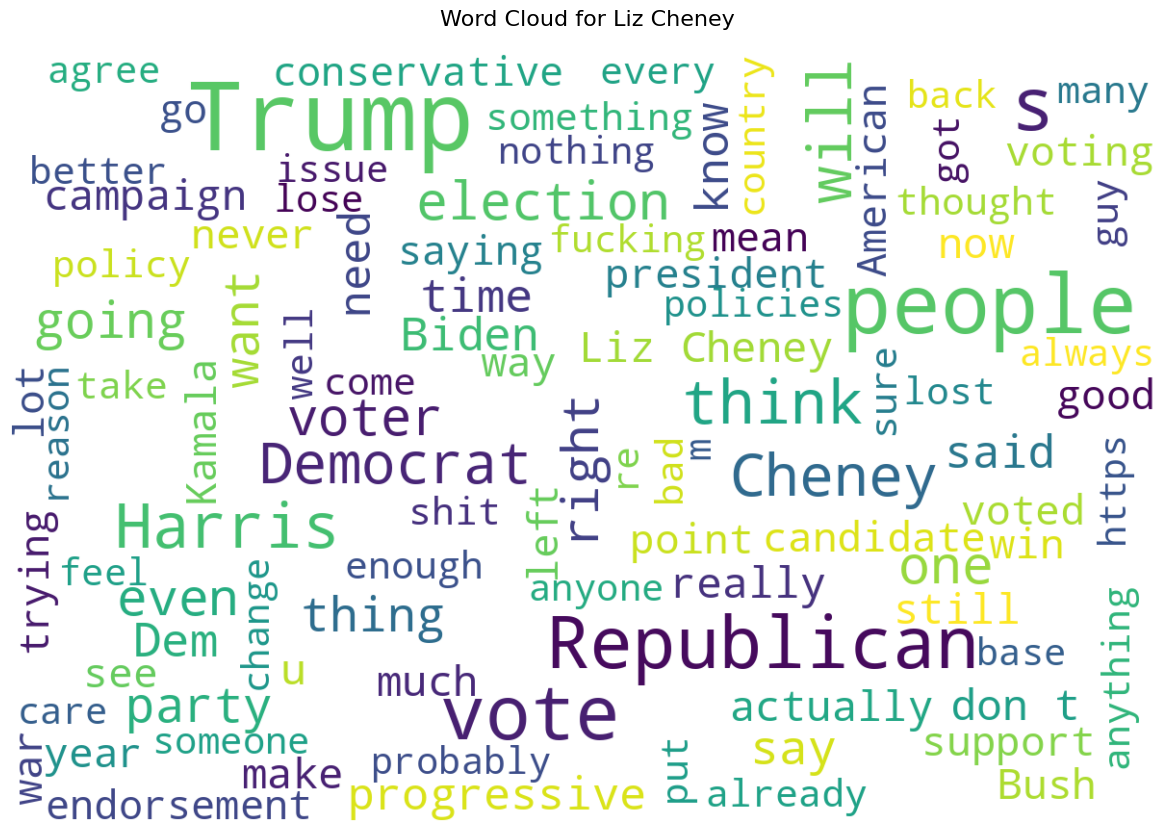

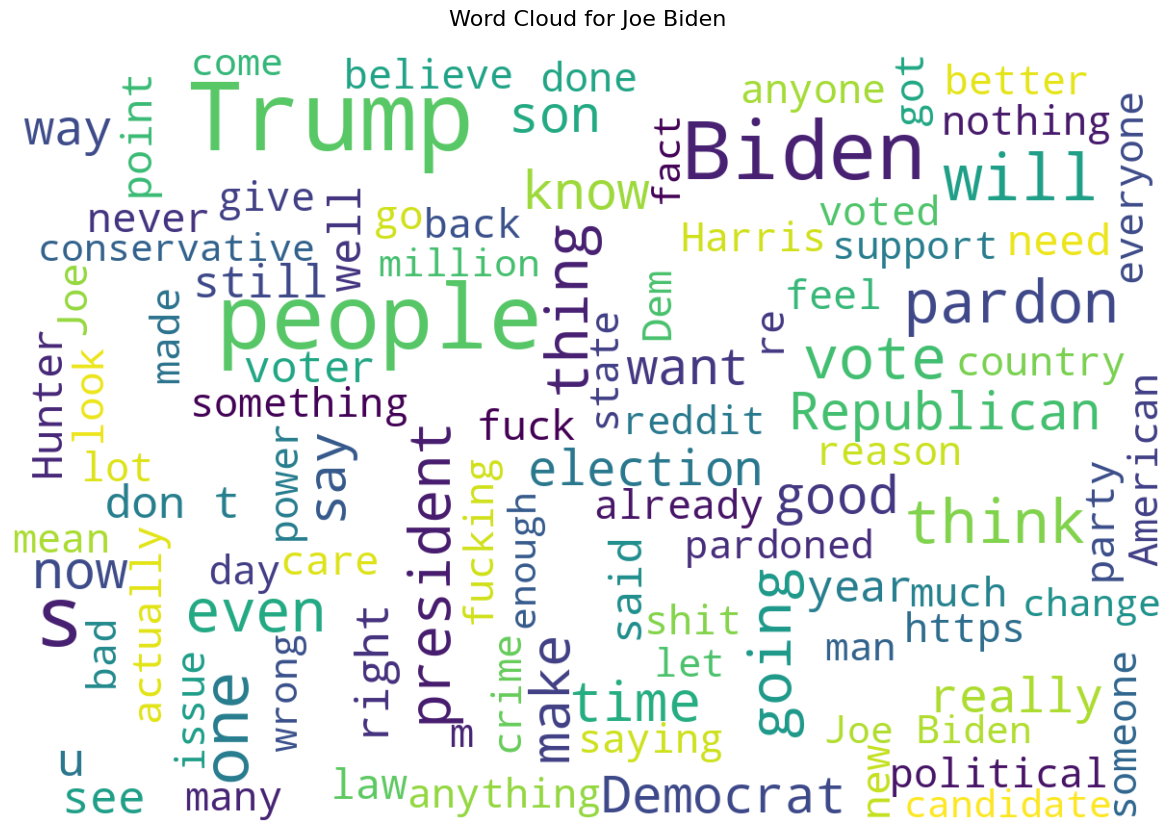

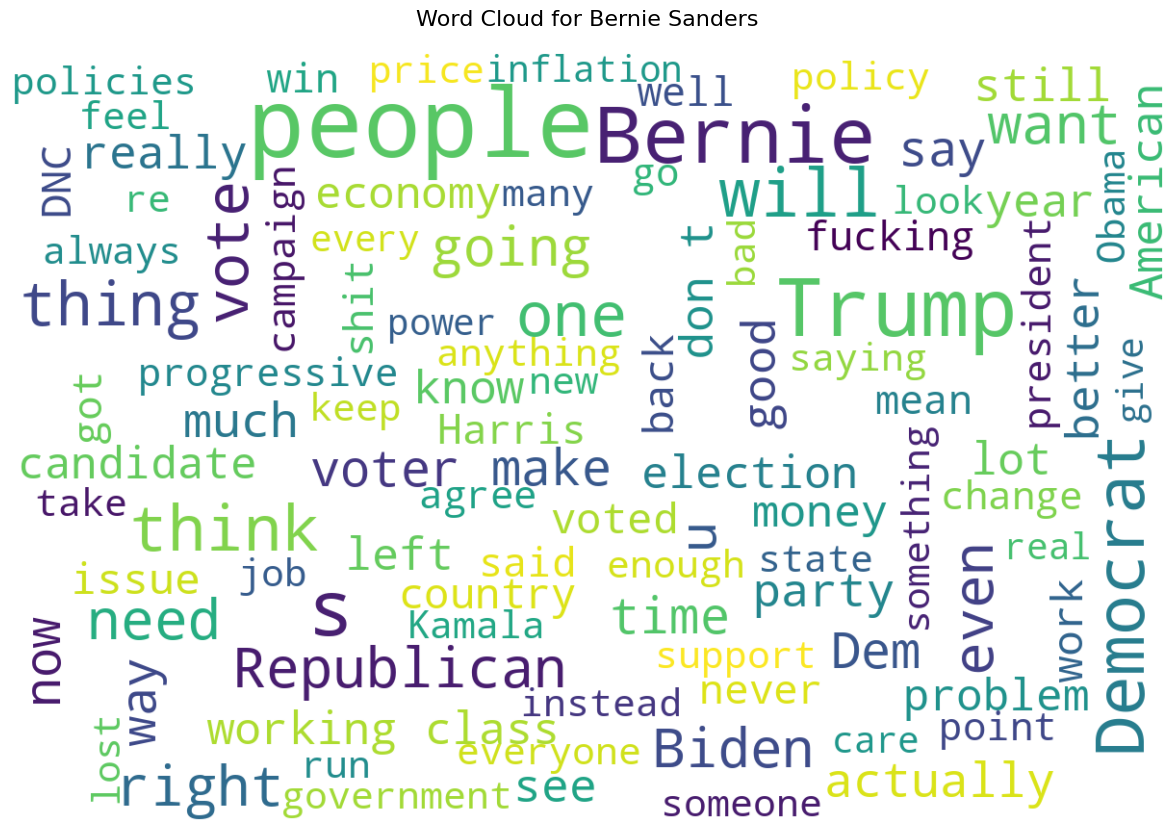

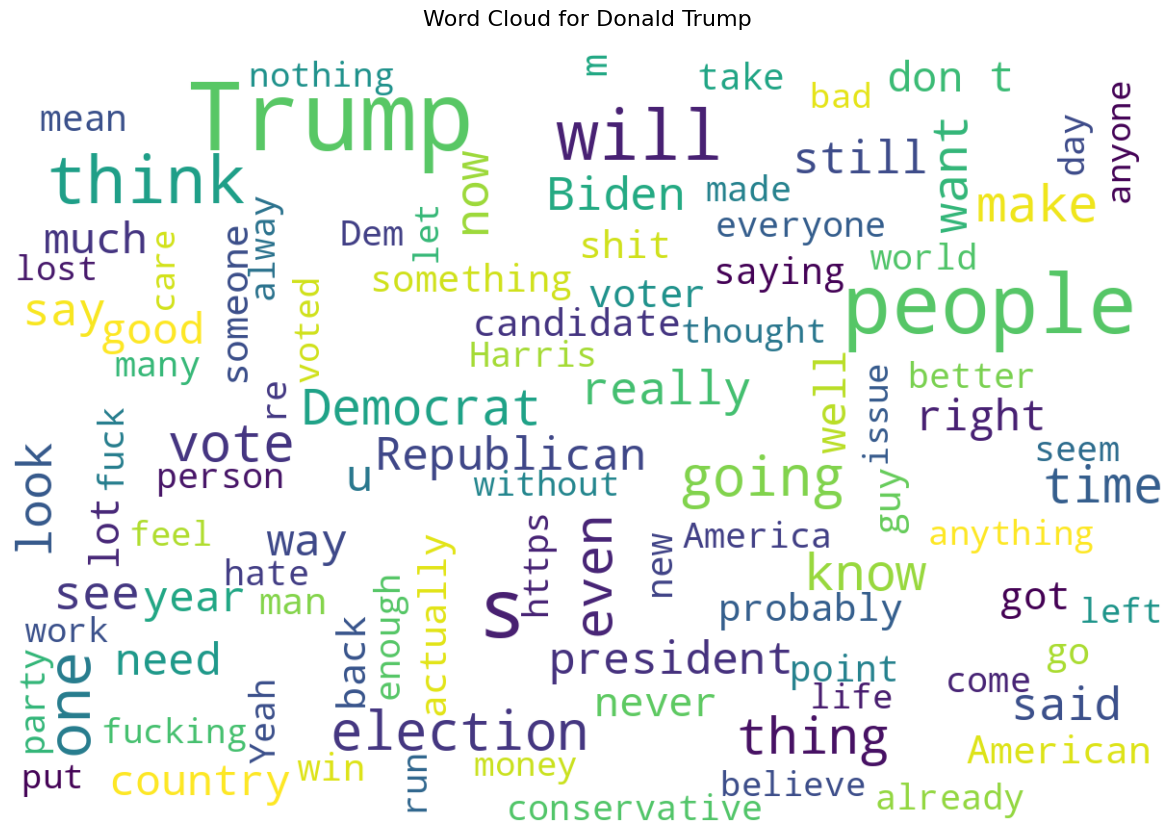

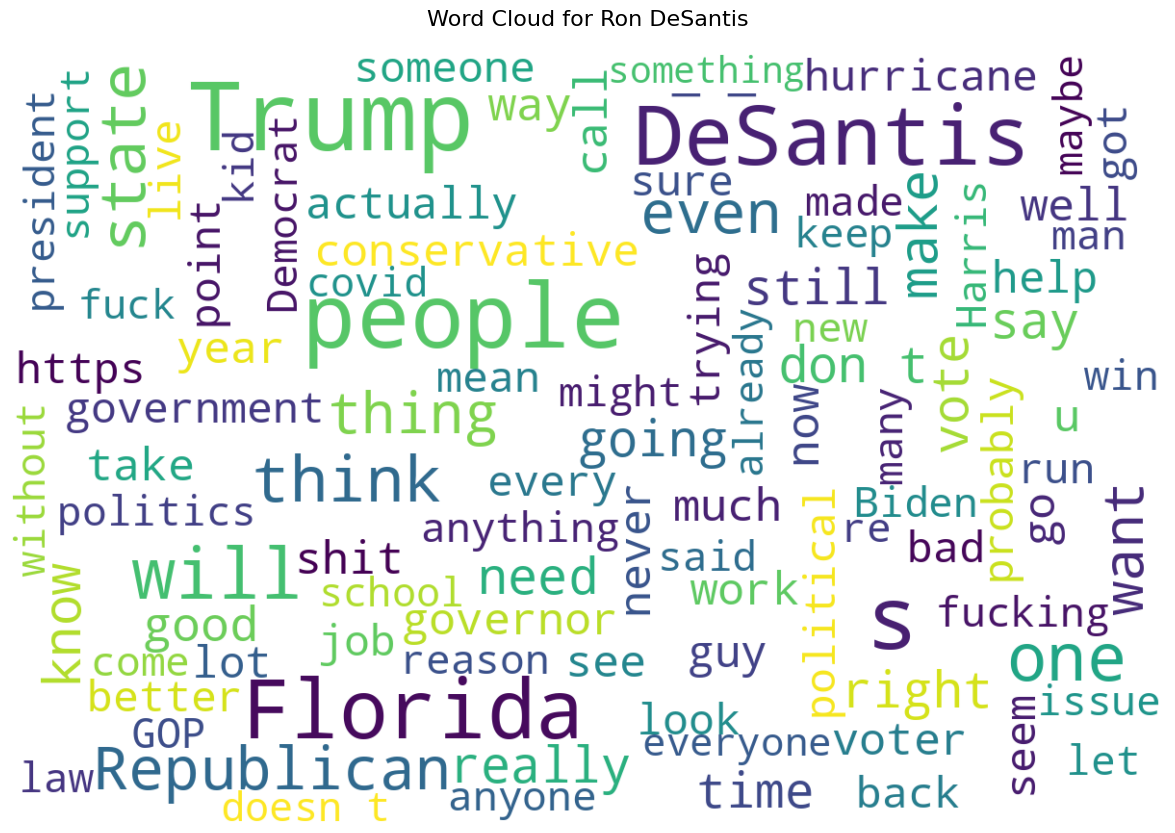

In [16]:
for politician in df['politician'].unique():
    comments = df[df['politician'] == politician]['comment_body']
    
    all_text = ' '.join([str(comment) for comment in comments])
    
    try:
        # word cloud
        wordcloud = WordCloud(
            width=1200, 
            height=800,
            background_color='white',
            max_words=100,
            colormap='viridis',
            prefer_horizontal=0.7,
            relative_scaling=0.5,
            min_font_size=10,
            max_font_size=100,
            random_state=42
        ).generate(all_text)
        
        plt.figure(figsize=(15, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {politician}', fontsize=16, pad=20)
        plt.show()
        
    except Exception as e:
        print(f"Error generating word cloud for {politician}: {e}")


## Discussion & Conclusion

### Key Findings

Through analysis of 34,283 Reddit comments about ten prominent politicians, our research revealed several significant findings:

1. **Party and Sentiment Patterns**
   - Democratic politicians received more positive sentiment scores compared to Republican politicians (0.059 vs -0.000071, p < 0.001)
   - This confirms our first hypothesis about Reddit's user base showing more favorable attitudes toward Democratic politicians

2. **Gender and Language Patterns**
   - Contrary to our second hypothesis, the use of personal attribute terms showed minimal difference between male and female politicians
   - The proportion of gender-related terms was similar between male (0.51%) and female (0.49%) politicians
   - The chi-square test (p = 0.26) indicated no significant difference in gendered language use

3. **Party-Gender Interaction**
   - Democratic female politicians received the highest positive sentiment (0.084)
   - Republican male politicians received slightly negative sentiment (-0.006)
   - This partially confirms our third hypothesis about distinct discussion patterns based on gender-party combination

### Research Limitations

1. **Platform Limitations**
   - Reddit's demographic characteristics may not represent broader public opinion
   - The three-month data collection period (October-December 2024) captures only recent discourse
   - Platform moderation may affect comment content

2. **Methodological Considerations**
   - VADER sentiment analysis may miss nuanced expressions
   - Word frequency analysis cannot capture context fully
   - Limited to English language comments

### Future Research Directions

1. **Expanding Research Scope**
   - Include other social media platforms, e.g. twitter
   - Conduct longitudinal analysis
   - Examine international political figures

2. **Methodological Improvements**
   - Apply more sophisticated NLP techniques
   - Include topic modeling
   - Analyze comment threads and interactions

### Conclusion


Our findings suggest that on Reddit, political party affiliation has a stronger influence on public discourse than gender. The platform's user base shows clear partisan preferences in their discussions, while gender-based differences are less pronounced than initially hypothesized. This could be attributed to Reddit's unique user demographics and community moderation system, which is more likely to filter out overtly biased content, potentially making our experimental results less accurate. This research contributes to our understanding of how political discussions manifest in digital spaces and how platform characteristics might influence public discourse patterns.

These results highlight the complex interplay between gender and party affiliation in shaping online political discussions, while also suggesting that traditional assumptions about gender bias in political discourse may need to be reconsidered in the context of modern social media platforms.


## References


Auxier, B., & Anderson, M. (2021). Social media use in 2021. *Pew Research Center, 1*(1), 1-4.


Barthel, M., Stocking, G., & Holcomb, J. (2016). Seven-in-Ten Reddit Users Get News on the Site. *Pew Research Center.*


McGregor, S. C., & Mourão, R. R. (2016). Talking politics on Twitter: Gender, elections, and social networks. *Social media+ society, 2*(3), 2056305116664218.


Rheault, L., Rayment, E., & Musulan, A. (2019). Politicians in the line of fire: Incivility and the treatment of women on social media. *Research & Politics, 6*(1), 2053168018816228.

Hutto, C., & Gilbert, E. (2014, May). Vader: A parsimonious rule-based model for sentiment analysis of social media text. In *Proceedings of the international AAAI conference on web and social media* (Vol. 8, No. 1, pp. 216-225).